In [2]:
import os

### End to End Machine Learning Project with Deployment on Azure and AWS and Running Pipeline CI/CD and configuration

### I have used the Student Performance Dataset 

### Life Cycle of Machine Learning Project

* Userstanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis 
* Data pre-Processing
* Model Training 
* Choose best Model 


### Problem Statement:
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Data Collection
* Dataset Source- https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance/data
* the Data consists of 8 columns and 1000 rows.

### 2.1 Import Data and Required Packages
#### Importing Pandas,Numpy,Matplotlib,Seaborn, and Warning Library


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/stud_dataset.csv')

### Show Top 5 Record

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [7]:
df.shape

(1000, 8)

### Data Checks to Perform 

* Check for missing values
* Check for data types
* Check for Duplicates
* Check the number of unique values of each column
* Check statistics of data set 
* Check various categories present in the different categorical column

### Check for missing values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values in the dataset

### Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

### There are no duplicates in the dataset

### Check data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking the unique values of each column

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of data set 

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [24]:
print('Categories in gender variable:',end=" ")
print(df['gender'].unique())
print('='*50)
print('Categories in race/ethnicity variable:',end=" ")
print(df['race_ethnicity'].unique())
print('='*50)
print('Categories in parental level of education variable:',end=" ")
print(df['parental_level_of_education'].unique())
print('='*50)
print('Categories in lunch variable:',end=" ")
print(df['lunch'].unique())
print('='*50)
print('Categories in test preparation course variable:',end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test preparation course variable: ['none' 'completed']


### define numerical & categorical columns 

In [25]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype =='O']

# print colums 
print('We have {} numeric features : {}'.format(len(numeric_feature),numeric_feature))
print('We have {} numeric features : {}'.format(len(categorical_feature),categorical_feature))

We have 3 numeric features : ['math_score', 'reading_score', 'writing_score']
We have 5 numeric features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [26]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print('Students who scored 100 in reading subjects:', reading_full)
print('Students who scored 100 in writing subjects:', writing_full)
print('Students who scored 100 in math subjects:', math_full)

Students who scored 100 in reading subjects: 17
Students who scored 100 in writing subjects: 14
Students who scored 100 in math subjects: 7


In [43]:
reading_less = df[df['reading_score']<=20]['average'].count()
writing_less = df[df['writing_score']<=20]['average'].count()
math_less = df[df['math_score']<=20]['average'].count()

print('Students who scored 20 in reading subjects:', reading_less)
print('Students who scored 20 in writing subjects:', writing_less)
print('Students who scored 20 in math subjects:', math_less)

Students who scored 20 in reading subjects: 1
Students who scored 20 in writing subjects: 3
Students who scored 20 in math subjects: 4


### Exploring Data (Visualization)
 #### Visualize average score distribution to make some conclusions
 * Histrogram
 * Kernel Distribution Function (KDE)

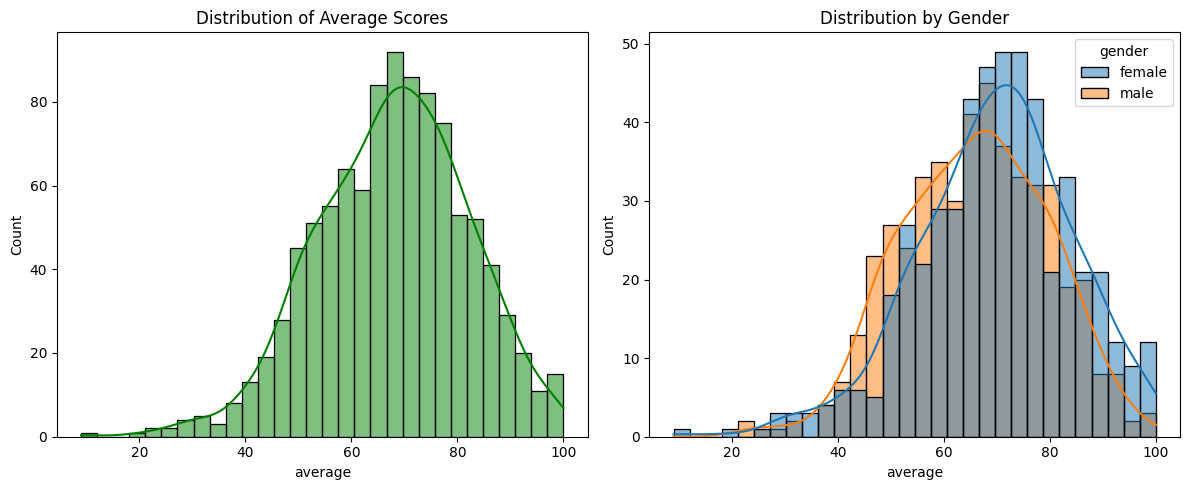

In [49]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # (rows=1, cols=2)

# First histogram (Single color)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axes[0])
axes[0].set_title('Distribution of Average Scores')

# Second histogram (Hue by gender)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender', ax=axes[1])
axes[1].set_title('Distribution by Gender')

# Show the plots
plt.tight_layout()
plt.show()



### Insights


##### Female students tend to perform better than male students

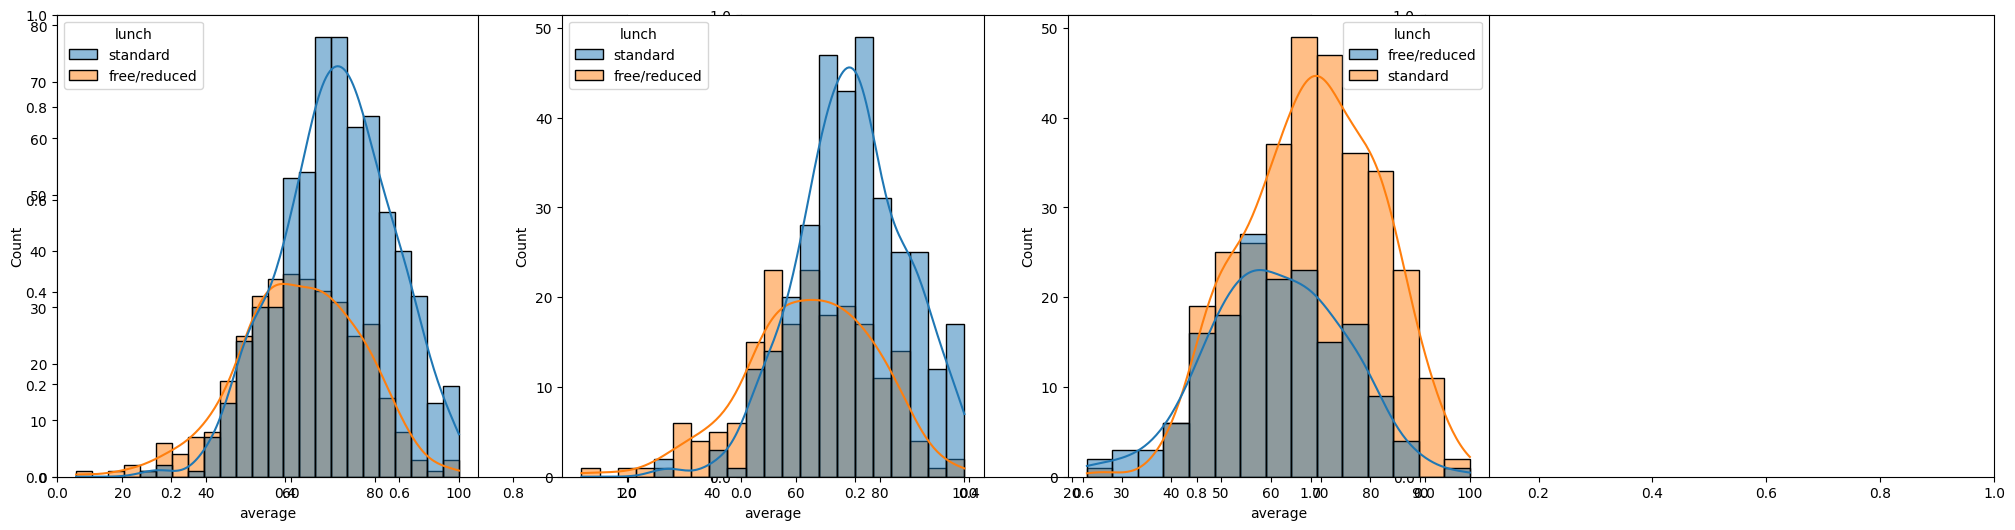

In [51]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [52]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average,reading_score_100
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,0
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,0
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,0
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,0
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,0


### Insights 
 * Female students tend to perform better in standard lunch compared to free/reduced lunch.
 * Standard lunch helps students perform well in exams.

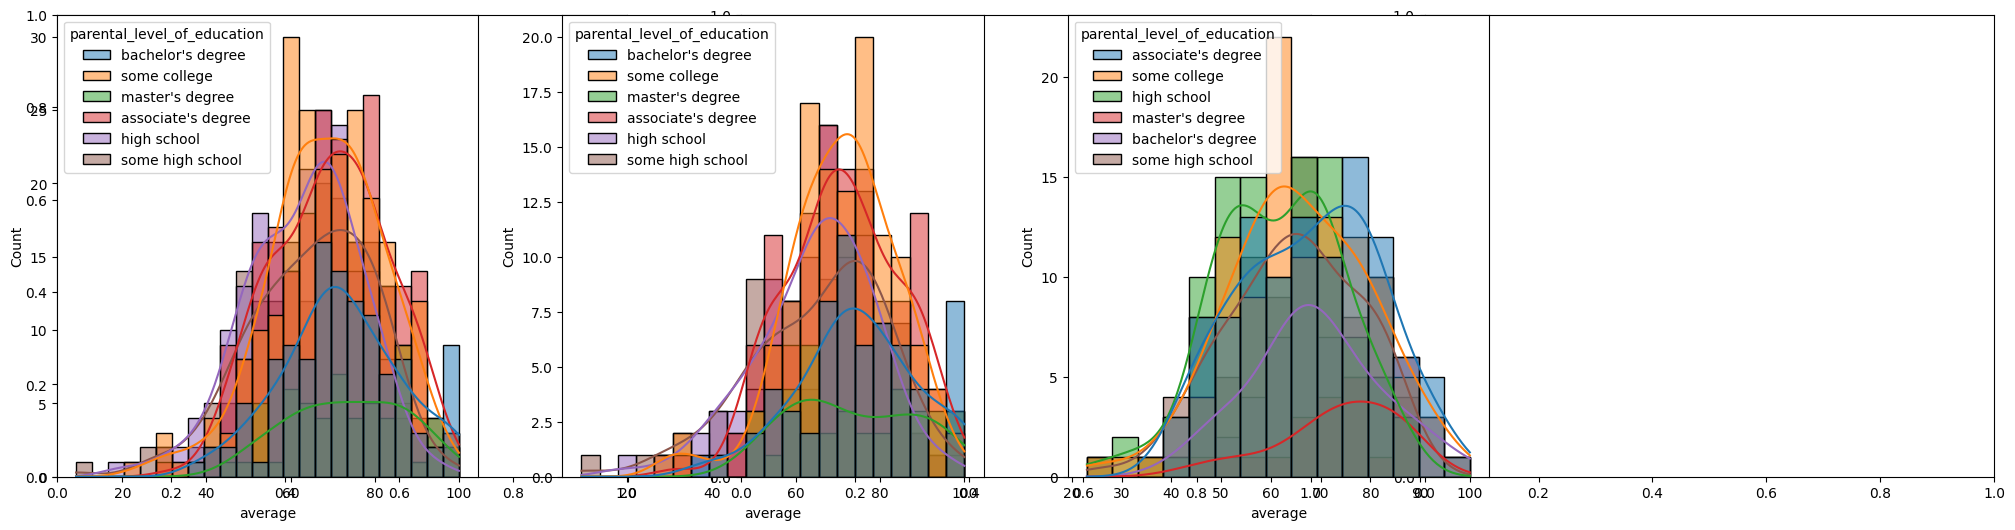

In [54]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

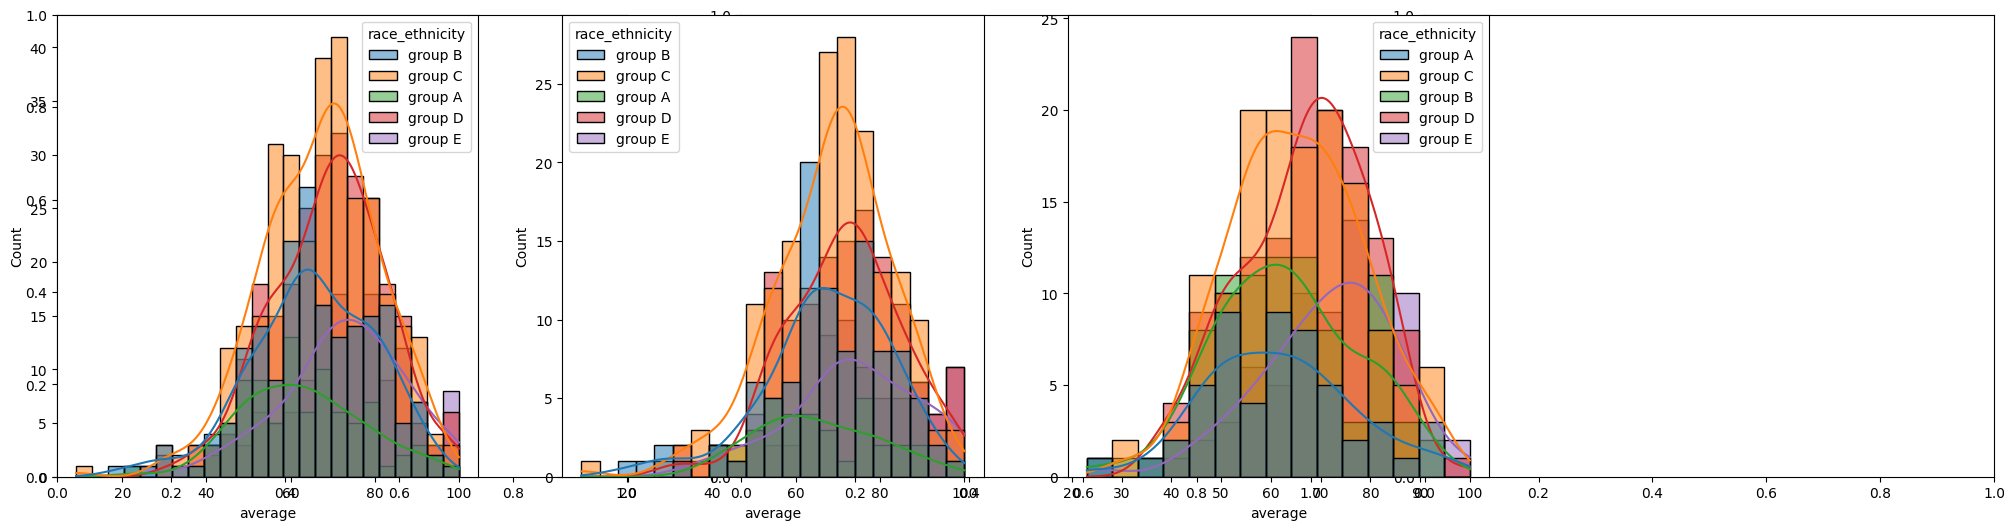

In [55]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights 
 * Students of group A and group B tends to perform poorly in exam
 * students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximum score of students in all three subjects

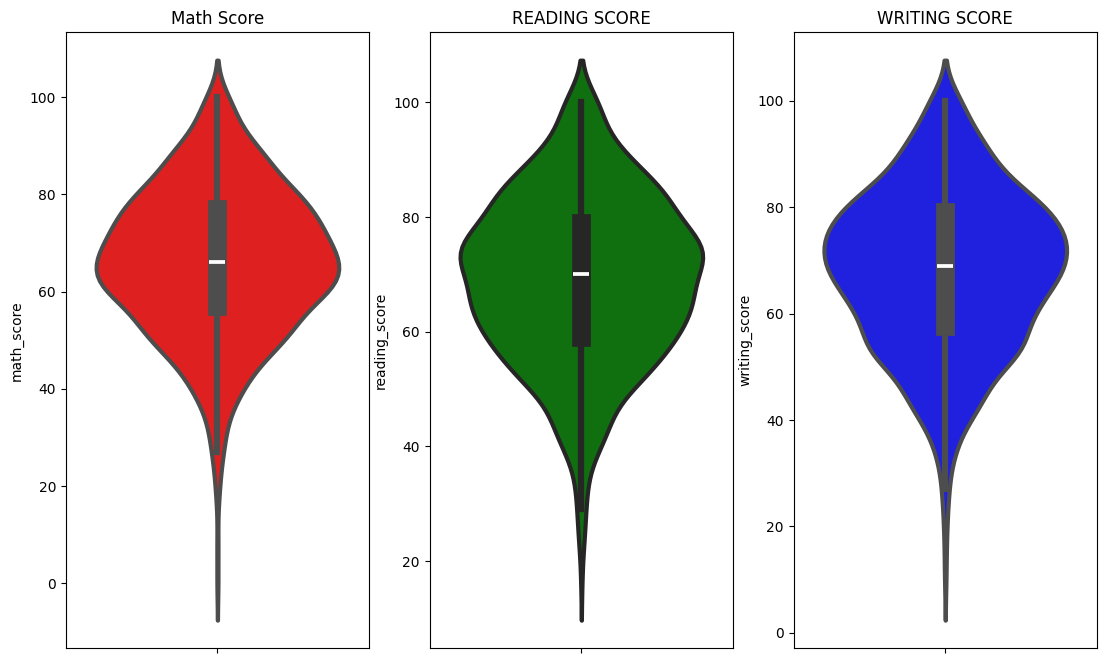

In [56]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')

sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)

plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Multivariate analysis using pieplot

********************************
********************************


(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

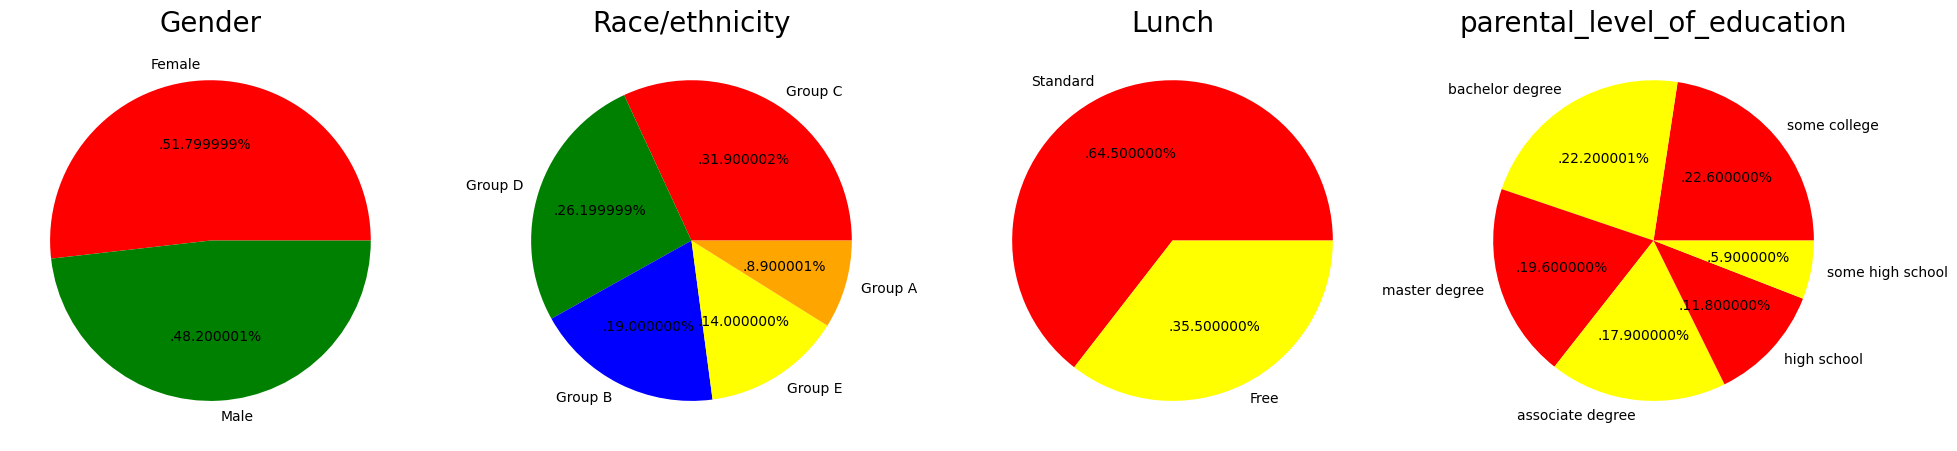

In [65]:
plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
lables = 'Female','Male'
color = ['red','green']
plt.pie(size,colors=color,labels=lables,autopct= '.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

print('********************************')
plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
lables='Group C','Group D','Group B','Group E','Group A'
colors=['red','green','blue','yellow','orange']
plt.pie(size,colors=colors,labels=lables,autopct='.%2f%%')
plt.title('Race/ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
lables='Standard','Free'
colors=['red','yellow']
plt.pie(size,colors=colors,labels=lables,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')
print('********************************')
plt.subplot(1,5,4)
size=df['parental_level_of_education'].value_counts()
lables='some college','bachelor degree','master degree','associate degree','high school','some high school'
colors=['red','yellow']
plt.pie(size,colors=colors,labels=lables,autopct='.%2f%%')
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average,reading_score_100
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,0
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,0
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,0
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,0
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,0
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,0
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,0


### Insights 
 * Number of Male and Female students is almost equal
 * Number of students are greatest in Group C 
 * Number of students who have standard lunch are greater
 * Number of students who have not enrolled in any test prepration course in greater 
 * Number of students whose parental education is 'Some College ' is greater followed closely by 'Associate Degree'

### Feature Wise Visualizatize

### Gender Column
 * How is distribution of students in different genders?
 * Does gender has any impact on students performance?
 * How is distribution of Race/ethnicity?
 * How is distribution of Parental level of education?
 * How is distribution of Lunch?
 * How is distribution of Gender ? 
 * Is gender has any impact on students performance ? 

### Univariate distributions Analysis (How is distribution of Gender?)

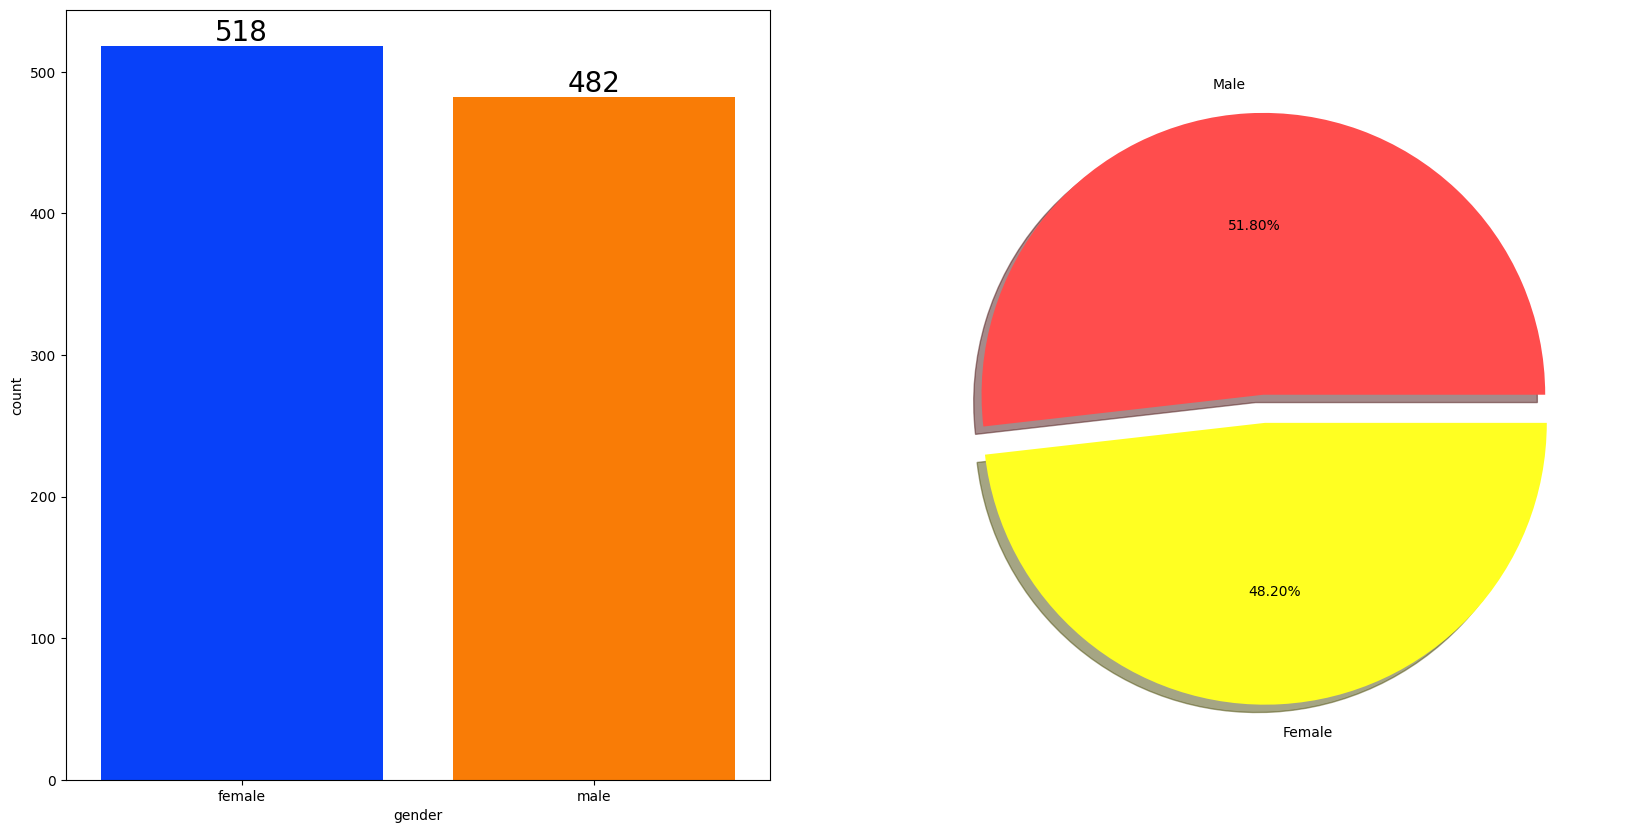

In [70]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male', 'Female'],explode=[0,0.1],autopct='%.2f%%',shadow=True,colors=['#ff4d4d','#ff2'])
plt.show()    

### Checking Outlier

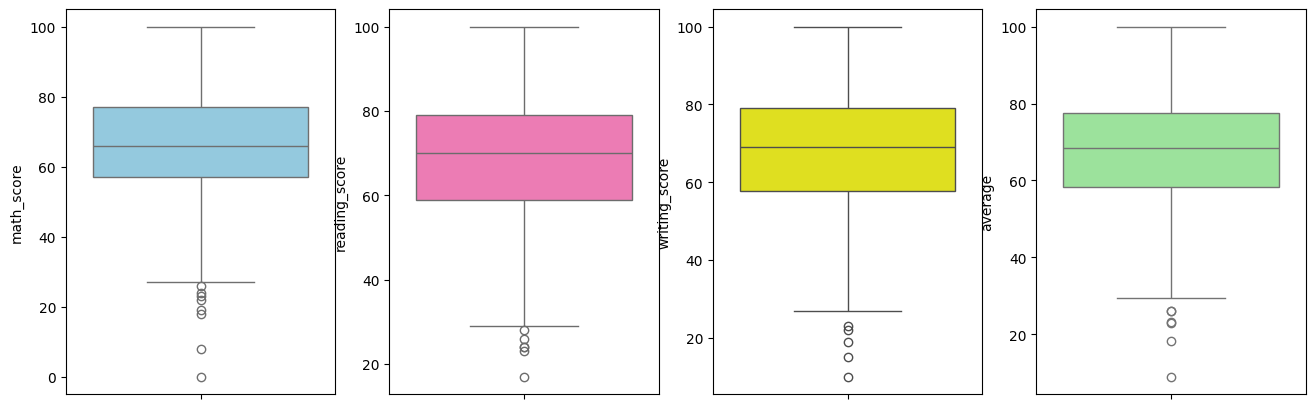

In [71]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### MULTIVARIATE ANALYSIS USING PAIRPLOT

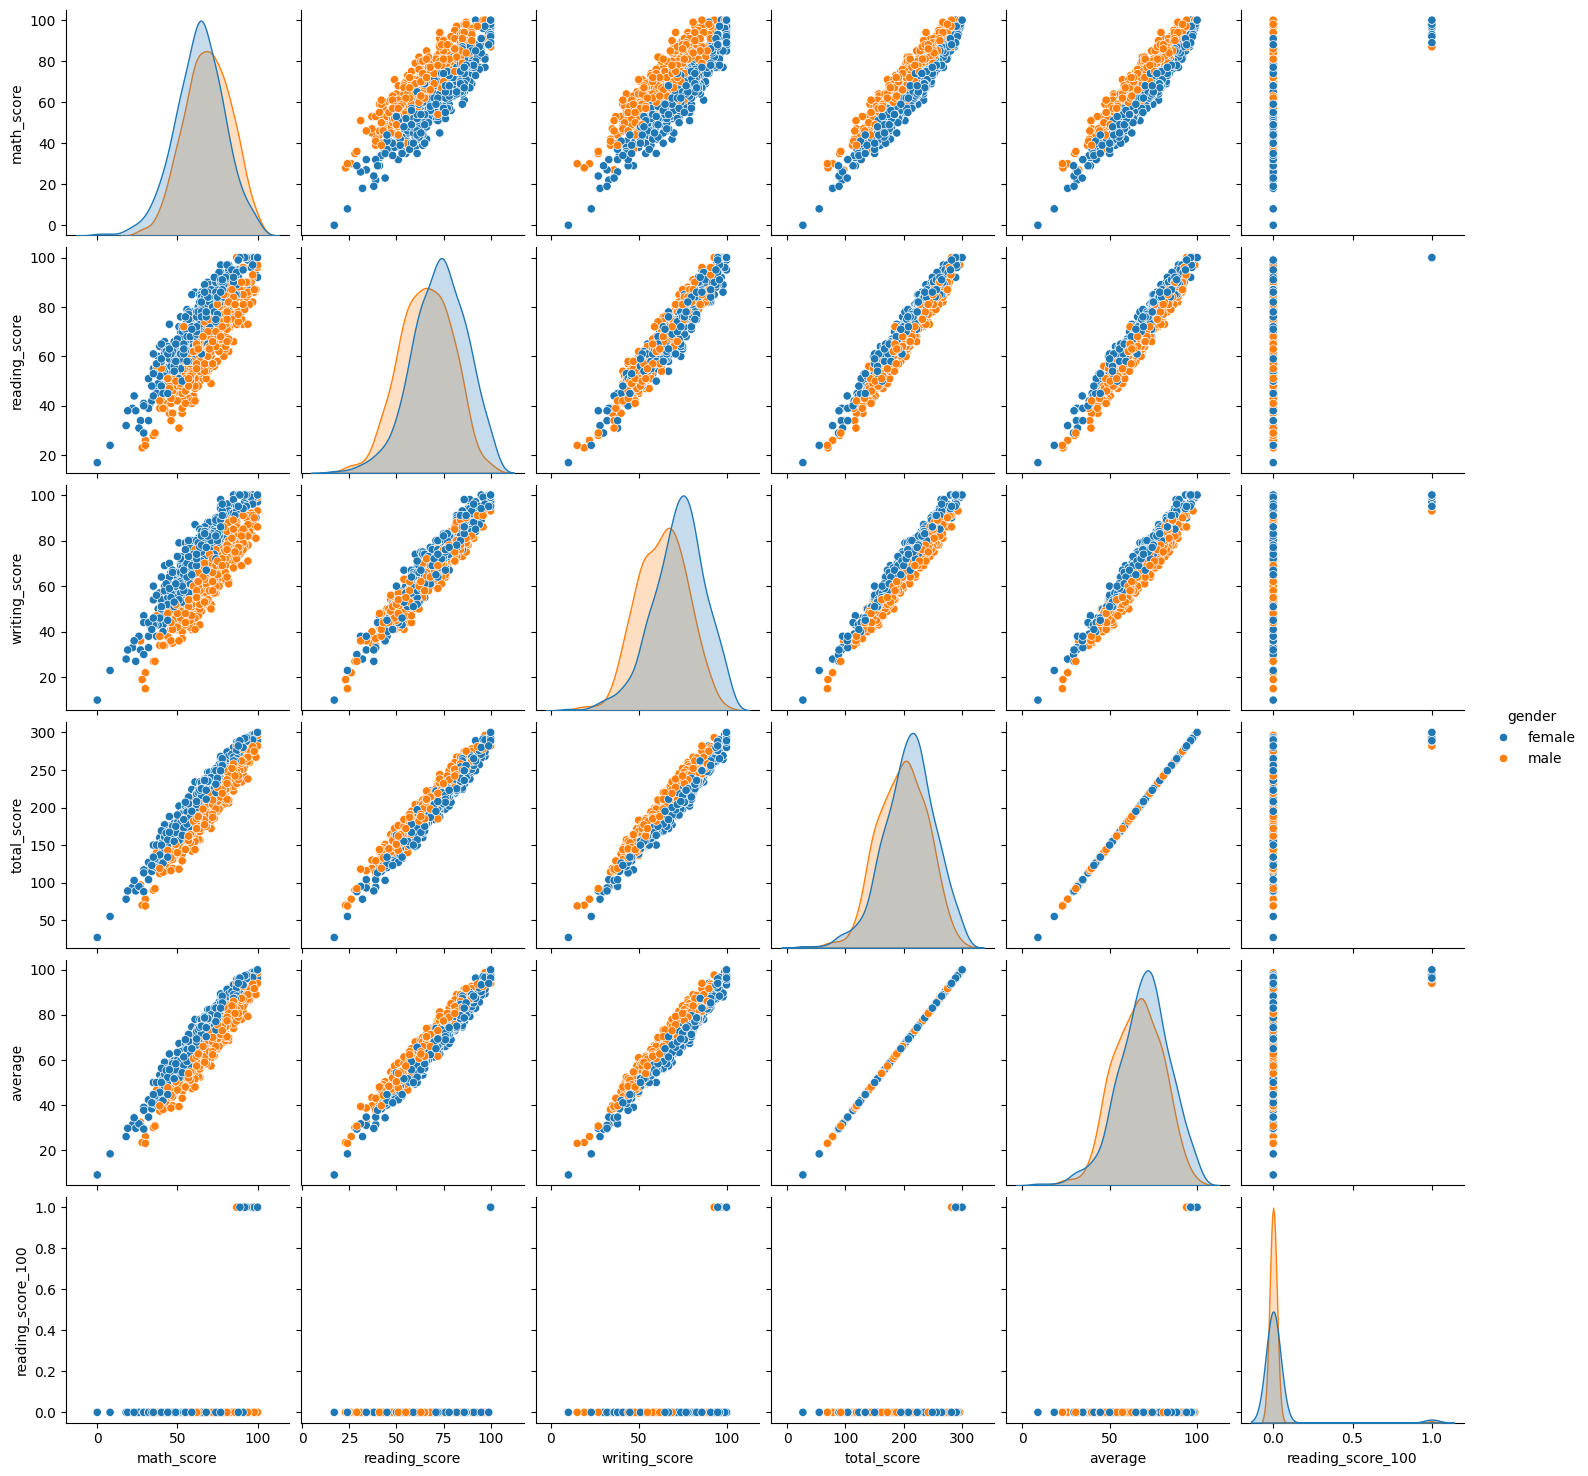

In [72]:
sns.pairplot(df,hue='gender')
plt.show()